In [13]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

%matplotlib inline

In [14]:
sample_path = 'sample/'
dogs_path = 'sample/dogs'
cats_path = 'sample/cats'

In [15]:
def load_image(file_path):
    if file_path is None or file_path == '':
        return None

    try:
        im = Image.open(file_path)
    except Exception as ex:
        print(ex)
    
    return im   

def load_images(path):
    images = []
    
    for file in sorted(os.listdir(path)):
        file_path = os.path.join(path, file)
        im = load_image(file_path)
        images.append(im)
    
    return images 

In [16]:
def view_images(images):
    cols = len(images) if len(images) < 10 else 10
    fig, axes = plt.subplots(figsize=(20,20), nrows=1, ncols=cols, sharey=True, sharex=True)
    for i, ax in enumerate(axes.flatten()):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)      
        im = ax.imshow(images[i])

In [17]:
def load_smaple():
    path = os.path.join(sample_path, 'dogs')
    samples = load_images(path)
    return [im.resize((224,224)) for im in samples]

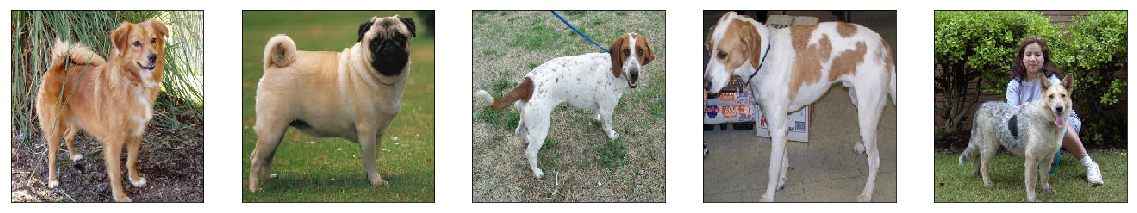

In [18]:
images = load_smaple()
view_images(images)